In [1]:
# importing all the neccessary dependencies for calculations and evaluation of 6 specified models
# importing all the learning classifiers following six (6) algorithms:
# 1. a single decision tree (DT)
# 2. a random forest (RF) learner
# 3. a support vector machine (SVM)
# 4. a grae
# 5. a multi-layer perceptron (MLP)
# 6. a k‐nearest neighbour (k-NN) classifier
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
# undersampling
from imblearn.under_sampling import RandomUnderSampler
# Oversampling
from imblearn.over_sampling import SMOTE
# confusion metric and accuracy score evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
# Precision and recall
from sklearn.metrics import classification_report
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dataset with label mush(mushrooms)

#### Importing the dataset with target label = "mush" and droping the "unnamed: 0" columns and specifying the number of rows and columns

In [2]:
df_mush = pd.read_csv("/Users/bhavneetsingh/Desktop/ML Assignment/ML_assignment-1_mushrooms.csv")
df_mush.drop(["Unnamed: 0"], inplace = True, axis = 1)
df_mush.shape

(1885, 13)

In [3]:
df_mush.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss,mushrooms
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,non-user
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,non-user
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,non-user
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,non-user
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,user


In [4]:
X_mush = df_mush.iloc[:,:-1].values
y_mush = df_mush.iloc[:,-1:].values

#### Data Balancing for mush dataset - Undersampling of the majority class 

In [5]:
# To Undersample the Majority Class using Random Undersampling to reduce the number of instances from the majority class. 

# Apply SMOTE to oversample the minority class
print(f"Original dataset shape: {Counter(df_mush.iloc[:,-1])}")

# Undersample the majority class
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X__mush_undersampled, y_mush_undersampled = undersampler.fit_resample(X_mush, y_mush)

print(f"Resampled dataset shape: {Counter(y_mush_undersampled)}")

Original dataset shape: Counter({'non-user': 1191, 'user': 694})
Resampled dataset shape: Counter({'non-user': 694, 'user': 694})


#### Data Balancing for mush dataset - Oversampling of the majority class 

In [6]:
# To handle the class imbalance by oversampling the minority class 
# using SMOTE (Synthetic Minority Over-sampling Technique). 

# X are (features) and y are the (labels) are your dataset
print(f"Original dataset shape: {Counter(df_mush.iloc[:,-1])}")

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_mush_oversampled, y_mush_oversampled = smote.fit_resample(X_mush, y_mush)

print(f"Resampled dataset shape: {Counter(y_mush_oversampled)}")

Original dataset shape: Counter({'non-user': 1191, 'user': 694})
Resampled dataset shape: Counter({'non-user': 1191, 'user': 1191})


#### Data Balancing for mush dataset - Combining oversampling and undersampling 

In [9]:
# Combine Undersampling and Oversampling

# Assume X (features) and y (labels) are your dataset
print(f"Original dataset shape: {Counter(df_mush.iloc[:,-1])}")

# Step 1: Undersampling to the majority class 
undersampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Reduce majority class to 50% of its original size
X_undersampled, y_undersampled = undersampler.fit_resample(X_mush, y_mush)
print(f"After undersampling: {Counter(y_undersampled)}")

# Step 2: SMOTE to oversample the minority class 
smote = SMOTE(random_state=42)
X_mush_balanced, y_mush_balanced = smote.fit_resample(X_undersampled, y_undersampled)
print(f"After SMOTE oversampling: {Counter(y_mush_balanced)}")

Original dataset shape: Counter({'non-user': 1191, 'user': 694})
After undersampling: Counter({'non-user': 867, 'user': 694})
After SMOTE oversampling: Counter({'non-user': 867, 'user': 867})


# A function that takes all 3 types of dataset UnderSampled, OverSampled and Balanced and produces the requires resutls 

In [10]:
def machineLearningResults(X, y):
    
#   Splitting the dataset into training and test size with 80:20 ratio.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#   Employing all the required Machine Learning models
    models = {
    'Decision Tree': DecisionTreeClassifier(criterion="entropy"),
    'Random Forest': RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0),
    'SVM': SVC(kernel="linear",random_state=0, probability=True),  # Use probability=True to get probability scores for ROC curve
    'Gradient Boost': GradientBoostingClassifier(),
    'Multi Layer Perceptron': MLPClassifier(max_iter=1500),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5,p=2,metric="minkowski"),
    }
    
#   Dictionary to store accuracy scores for each model
    results = {}
    
#   Dictionary for confusion Matrix
    model_matrix = {
        'Decision Tree': [[],[]],
        'Random Forest': [[], []],
        'SVM': [[], []],
        'Gradient Boost': [[], []],
        'Multi Layer Perceptron': [[], []],
        'K-Nearest Neighbors': [[], []],
    }
    
#   Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy and store in results
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name] = accuracy
        model_matrix[model_name][0] = y_test
        model_matrix[model_name][1] = y_pred
        
#   Print all accuracy results
    print("Model performance on dataset with accuracy:")
    for model_name, accuracy in results.items():
        print(f"{model_name}: {accuracy*100:.2f}%")
        
#   Confusion Matrix for all the models
    print("Model performance on dataset with confusion matrix:")
    for model_name, target_list in model_matrix.items():
        print(f"Confusion matrix for {model_name}:")
        y_test = target_list[0]
        y_pred = target_list[1]
        matrix = confusion_matrix(y_test,y_pred)
        print(matrix)
        
#   Classification report for all the models  
    print("Model performance on dataset Classification report:")
    for model_name in model_matrix:
        print(f"Classification report for {model_name}:")
        y_test = model_matrix[model_name][0]
        y_pred = model_matrix[model_name][1]
        print(classification_report(y_test, y_pred))
        
#   Evaluation by ROC curve with all the models for a particular dataset
    print("Model performance on dataset ROC curve:")
    y_preds = []
    y_true = y_test
    y_true[y_true == "user"] = 1
    y_true[y_true == "non-user"] = 0
    y_true = y_true.astype(int)
    
    # Storing predicted values of every model in y_preds for ROC plot
    for model_name, target_list in model_matrix.items():
        y_pred = target_list[1]
        y_pred[y_pred == "user"] = 1
        y_pred[y_pred == "non-user"] = 0
        y_pred = y_pred.astype(int)
        y_preds.append(y_pred)
        
    # Plotting the ROC curve
    model_names = ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'Gradient Boost', 'MLP', 'KNN']
    plt.figure(figsize=(10, 8))
    for i, y_pred in enumerate(y_preds):
        fpr, tpr, _ = roc_curve(y_true, y_pred, pos_label = 1)
        roc_auc = auc(fpr, tpr)
    
        plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiple Models')
    plt.legend(loc="lower right")
    plt.show()

## Calling machineLearningResults() for undersampled dataset

/Users/bhavneetsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model performance on dataset with accuracy:
Decision Tree: 72.30%
Random Forest: 79.14%
SVM: 79.86%
Gradient Boost: 80.94%
Multi Layer Perceptron: 72.66%
K-Nearest Neighbors: 75.90%
Model performance on dataset with confusion matrix:
Confusion matrix for Decision Tree:
[[ 96  42]
 [ 35 105]]
Confusion matrix for Random Forest:
[[102  36]
 [ 22 118]]
Confusion matrix for SVM:
[[107  31]
 [ 25 115]]
Confusion matrix for Gradient Boost:
[[107  31]
 [ 22 118]]
Confusion matrix for Multi Layer Perceptron:
[[ 99  39]
 [ 37 103]]
Confusion matrix for K-Nearest Neighbors:
[[ 95  43]
 [ 24 116]]
Model performance on dataset Classification report:
Classification report for Decision Tree:
              precision    recall  f1-score   support

    non-user       0.73      0.70      0.71       138
        user       0.71      0.75      0.73       140

    accuracy                           0.72       278
   macro avg       0.72      0.72      0.72       278
weighted avg       0.72      0.72      0.

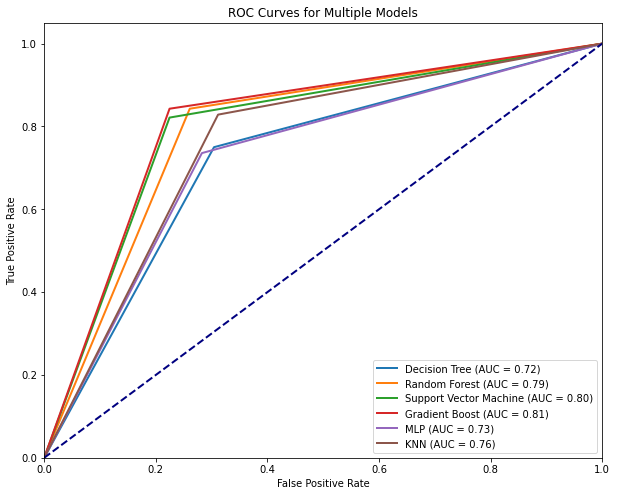

In [11]:
machineLearningResults(X__mush_undersampled, y_mush_undersampled)

## Calling machineLearningResults() for oversampled dataset

/Users/bhavneetsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model performance on dataset with accuracy:
Decision Tree: 77.78%
Random Forest: 83.44%
SVM: 77.36%
Gradient Boost: 79.87%
Multi Layer Perceptron: 80.50%
K-Nearest Neighbors: 77.57%
Model performance on dataset with confusion matrix:
Confusion matrix for Decision Tree:
[[186  57]
 [ 49 185]]
Confusion matrix for Random Forest:
[[199  44]
 [ 35 199]]
Confusion matrix for SVM:
[[187  56]
 [ 52 182]]
Confusion matrix for Gradient Boost:
[[187  56]
 [ 40 194]]
Confusion matrix for Multi Layer Perceptron:
[[189  54]
 [ 39 195]]
Confusion matrix for K-Nearest Neighbors:
[[165  78]
 [ 29 205]]
Model performance on dataset Classification report:
Classification report for Decision Tree:
              precision    recall  f1-score   support

    non-user       0.79      0.77      0.78       243
        user       0.76      0.79      0.78       234

    accuracy                           0.78       477
   macro avg       0.78      0.78      0.78       477
weighted avg       0.78      0.78      0.

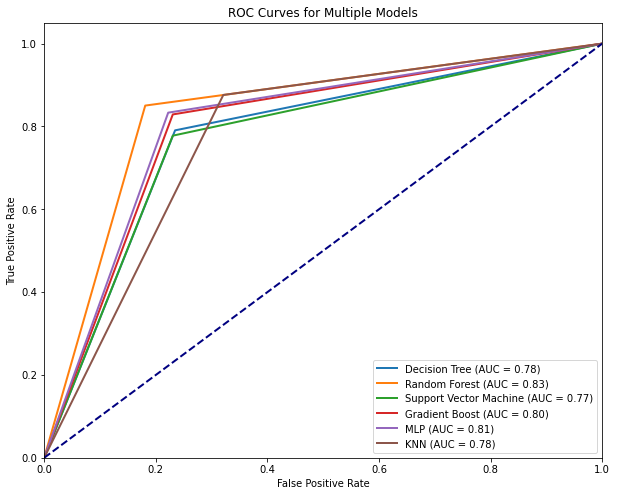

In [12]:
machineLearningResults(X_mush_oversampled, y_mush_oversampled)

## Calling machineLearningResults() for the balanced dataset

/Users/bhavneetsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model performance on dataset with accuracy:
Decision Tree: 70.03%
Random Forest: 80.12%
SVM: 77.52%
Gradient Boost: 80.40%
Multi Layer Perceptron: 76.95%
K-Nearest Neighbors: 78.10%
Model performance on dataset with confusion matrix:
Confusion matrix for Decision Tree:
[[126  57]
 [ 47 117]]
Confusion matrix for Random Forest:
[[148  35]
 [ 34 130]]
Confusion matrix for SVM:
[[144  39]
 [ 39 125]]
Confusion matrix for Gradient Boost:
[[150  33]
 [ 35 129]]
Confusion matrix for Multi Layer Perceptron:
[[140  43]
 [ 37 127]]
Confusion matrix for K-Nearest Neighbors:
[[134  49]
 [ 27 137]]
Model performance on dataset Classification report:
Classification report for Decision Tree:
              precision    recall  f1-score   support

    non-user       0.73      0.69      0.71       183
        user       0.67      0.71      0.69       164

    accuracy                           0.70       347
   macro avg       0.70      0.70      0.70       347
weighted avg       0.70      0.70      0.

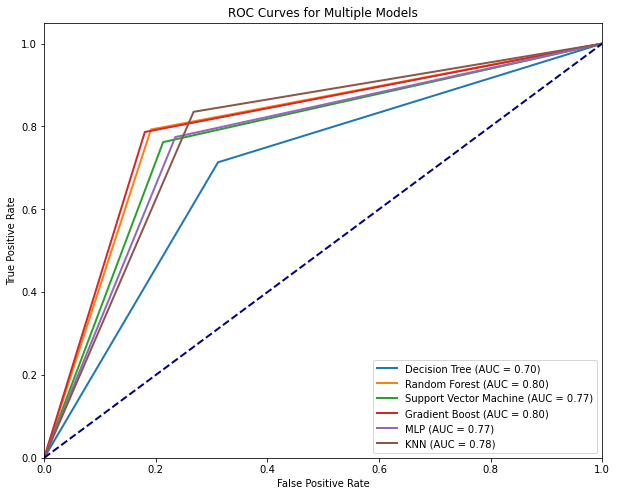

In [13]:
machineLearningResults(X_mush_balanced, y_mush_balanced)